# Visualizing Features

In [1]:
%config InlineBackend.figure_format='retina'
import logging
from ekorpkit import eKonf

logging.basicConfig(level=logging.INFO)
print(eKonf.__version__)

0.1.31+14.g35d2a7e.dirty


In [2]:
data_dir = "../data/fomc"
save_dataframe = eKonf.partial(
    config_group="_func_/save_dataframe", output_dir=data_dir
)
load_dataframe = eKonf.partial(config_group="_func_/load_dataframe", data_dir=data_dir)

## Build and load a feature set

In [3]:
cfg = eKonf.compose(config_group="dataset=feature_build")
cfg.name = "fomc_features_small"
cfg.data_dir = data_dir
cfg.data_file = "econ_train_small.parquet"
cfg.force_rebuild = True
cfg.pipeline.reset_index.index_column_name = "date"
cfg.column_info.columns.index = "date"
cfg.column_info.columns.id = "index"
cfg.column_info.columns.x = [
    "prev_decision",
    "GDP_diff_prev",
    "PMI",
    "EMP_diff_prev",
    "RSALES_diff_year",
    "UNEMP_diff_prev",
    "HSALES_diff_year",
    "Inertia_diff",
    "Balanced_diff",
]
cfg.column_info.columns.y = "target"
cfg.verbose = False
f_small = eKonf.instantiate(cfg)
f_small.persist()

INFO:ekorpkit.datasets.feature:Loaded info file: ../data/fomc/fomc_features_small/info-fomc_features_small.yaml
INFO:ekorpkit.pipelines.pipe:Applying pipeline: OrderedDict([('load_dataframe', 'load_dataframe'), ('reset_index', 'reset_index'), ('split_sampling', 'split_sampling')])
INFO:ekorpkit.ekonf:Applying pipe: functools.partial(<function load_dataframe at 0x7fa9a7af3310>)
INFO:ekorpkit.io.file:Processing [1] files from [['econ_train_small.parquet']]
INFO:ekorpkit.pipelines.pipe:Loading 1 dataframes from ['../data/fomc/econ_train_small.parquet']
INFO:ekorpkit.io.file:Loading data from ../data/fomc/econ_train_small.parquet
INFO:ekorpkit.ekonf:Applying pipe: functools.partial(<function reset_index at 0x7fa9a7af4670>)
INFO:ekorpkit.ekonf:Applying pipe: functools.partial(<function split_sampling at 0x7fa9a7af4280>)
INFO:ekorpkit.io.file:Saving dataframe as ../data/fomc/fomc_features_small/fomc_features_small-train.parquet
INFO:ekorpkit.io.file:Saving dataframe as ../data/fomc/fomc_feat

In [4]:
cfg = eKonf.compose(config_group="dataset=feature")
cfg.name = "fomc_features_small"
cfg.data_dir = data_dir
cfg.data_file = "econ_train_small.parquet"
f_small = eKonf.instantiate(cfg)

INFO:ekorpkit.datasets.feature:Loaded info file: ../data/fomc/fomc_features_small/info-fomc_features_small.yaml
INFO:ekorpkit.io.file:Loading data from ../data/fomc/fomc_features_small/fomc_features_small-train.parquet
INFO:ekorpkit.info.feature:Added a column [split] with value [train]
INFO:ekorpkit.io.file:Loading data from ../data/fomc/fomc_features_small/fomc_features_small-test.parquet
INFO:ekorpkit.info.feature:Added a column [split] with value [test]


In [5]:
f_small.INFO

{'splits': {'train': {'data_file': 'fomc_features_small-train.parquet',
   'name': 'train',
   'num_examples': 332,
   'num_bytes': 49800,
   'human_bytes': '48.63 KiB'},
  'test': {'data_file': 'fomc_features_small-test.parquet',
   'name': 'test',
   'num_examples': 83,
   'num_bytes': 12367,
   'human_bytes': '12.08 KiB'}},
 'num_examples': 415,
 'size_in_bytes': 62167,
 'size_in_human_bytes': '60.71 KiB',
 'data_files': {'train': 'fomc_features_small-train.parquet',
  'test': 'fomc_features_small-test.parquet'},
 'meta_files': {},
 'data_files_modified': '2022-06-05 07:59:18',
 'info_updated': '2022-06-05 07:59:18',
 'column_info': {'keys': {'index': 'date',
   'id': 'id',
   'x': 'x',
   'y': 'y',
   'split': 'split'},
  'columns': {'index': 'date',
   'id': ['date', 'split'],
   'x': ['prev_decision',
    'GDP_diff_prev',
    'PMI',
    'EMP_diff_prev',
    'RSALES_diff_year',
    'UNEMP_diff_prev',
    'HSALES_diff_year',
    'Inertia_diff',
    'Balanced_diff'],
   'y': 'target

In [6]:
y_train = f_small.y_train
print(f_small.FEATURE.Y)
y_train[:5]

target


date
2020-12-16    0
2007-03-21    0
2000-05-16    1
1986-02-12    0
2014-10-29    1
Name: target, dtype: int64

In [7]:
X_train = f_small.X_train
print(f_small.FEATURE.X)
X_train[:5]

['prev_decision', 'GDP_diff_prev', 'PMI', 'EMP_diff_prev', 'RSALES_diff_year', 'UNEMP_diff_prev', 'HSALES_diff_year', 'Inertia_diff', 'Balanced_diff']


,prev_decision,GDP_diff_prev,PMI,EMP_diff_prev,RSALES_diff_year,UNEMP_diff_prev,HSALES_diff_year,Inertia_diff,Balanced_diff
date,,,,,,,,,
2020-12-16,0.0,7.547535,57.7,0.234047,3.055276,-2.898551,22.622478,0.0,0.0
2007-03-21,0.0,0.843712,51.9,0.058919,0.196754,-2.173913,-21.960415,0.0,0.0
2000-05-16,1.0,0.364447,54.7,0.221891,4.213922,-5.000000,-8.387800,0.0,0.0
1986-02-12,-1.0,0.743327,51.2,0.124735,2.094256,-4.285714,13.643411,0.0,0.0
2014-10-29,0.0,1.284129,56.1,0.221892,3.239959,-3.278689,16.625310,0.0,0.0


In [8]:
X = f_small.X
y = f_small.y
X_cols = f_small.FEATURE.X
y_cols = f_small.FEATURE.Y

## Visualize Features

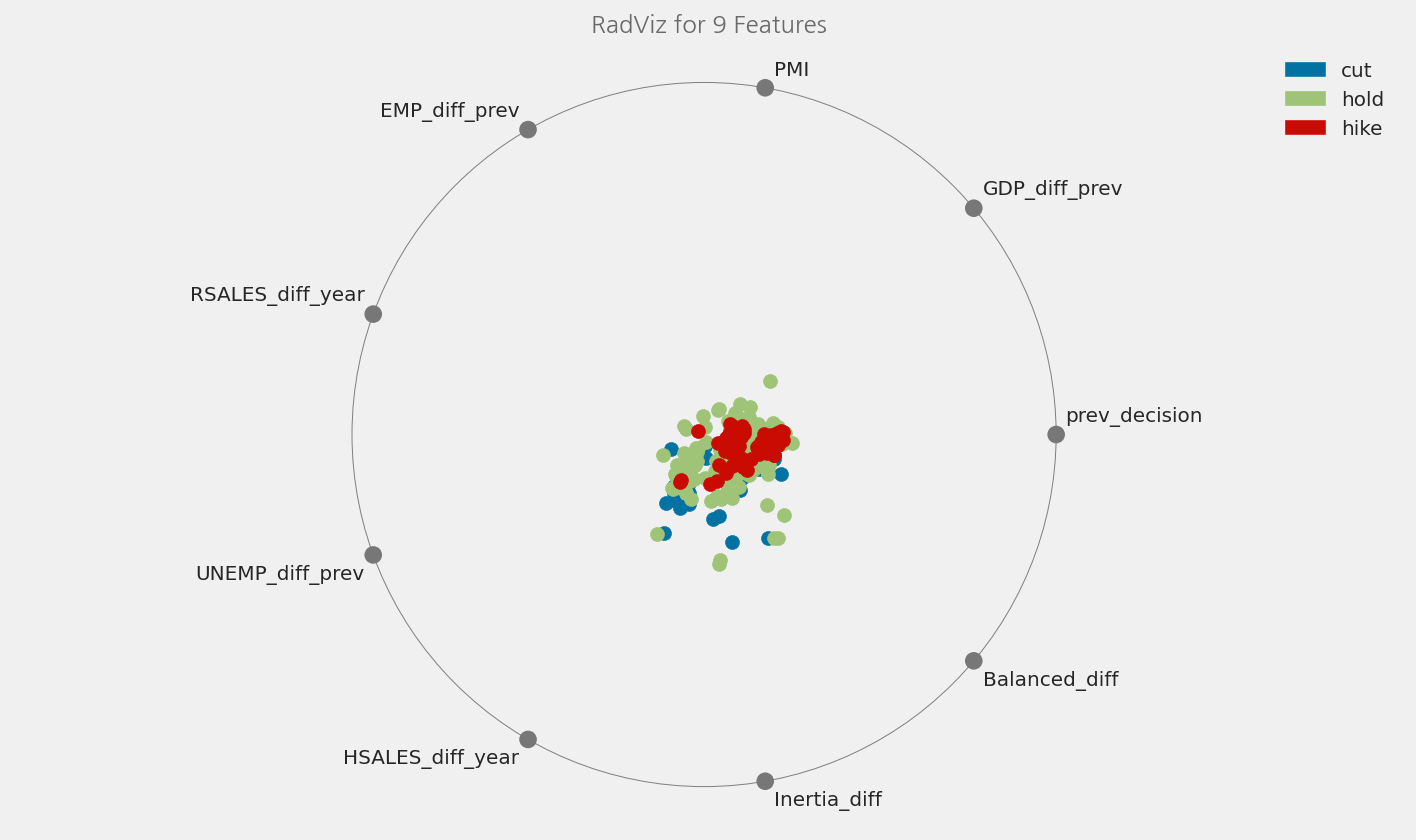

INFO:ekorpkit.visualize.plot:Saved figure to ./figs/plot_RadViz.png


<Figure size 576x396 with 0 Axes>

In [9]:
cfg = eKonf.compose(config_group="visualize/plot=radviz")
cfg.plots[0].x = X_cols
cfg.plots[0].y = y_cols
cfg.plots[0].classes = ["cut", "hold", "hike"]
cfg.figure.figsize = (10, 6)
cfg.figure.fontsize = 14
eKonf.instantiate(cfg, data=f_small.data)

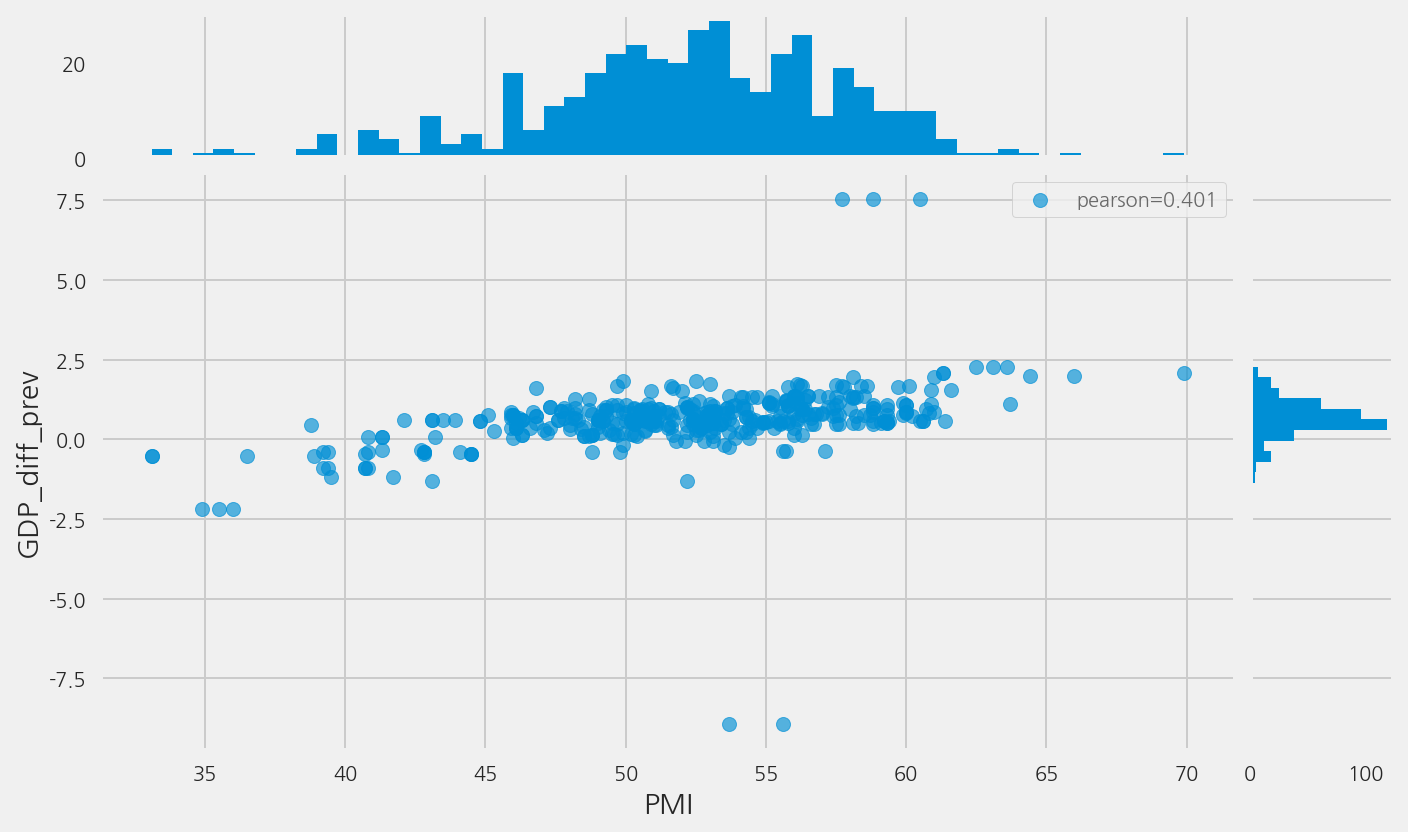

INFO:ekorpkit.visualize.plot:Saved figure to ./figs/plot_JointPlot.png


<Figure size 576x396 with 0 Axes>

In [14]:
cfg = eKonf.compose(config_group="visualize/plot=jointplot")
cfg.plots[0].x = X_cols
cfg.plots[0].y = y_cols
cfg.plots[0].columns=["PMI", "GDP_diff_prev"]
cfg.figure.figsize = (10, 6)
cfg.figure.fontsize = 14
eKonf.instantiate(cfg, data=f_small.data)

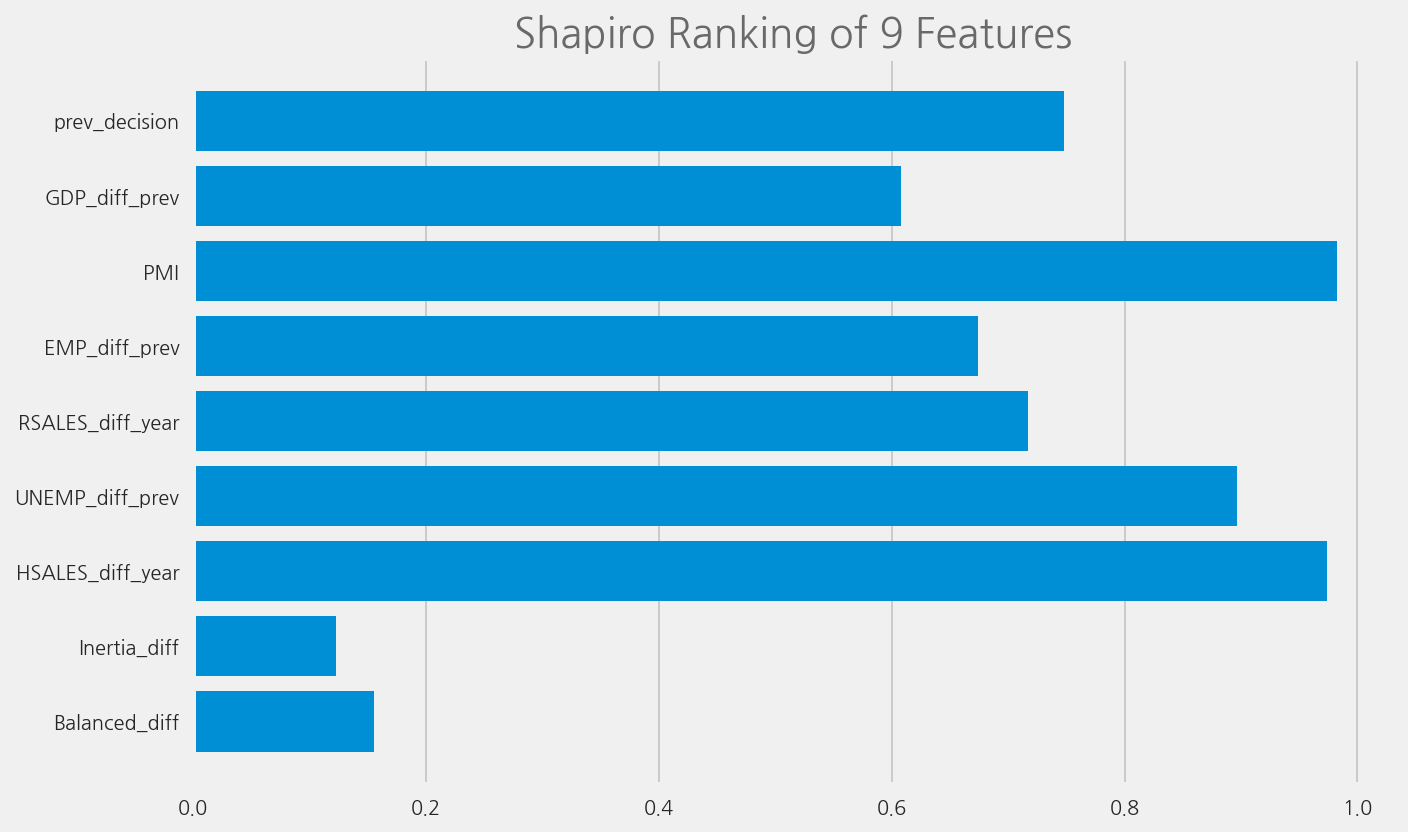

INFO:ekorpkit.visualize.plot:Saved figure to ./figs/plot_Rank1D.png


<Figure size 576x396 with 0 Axes>

In [16]:
cfg = eKonf.compose(config_group="visualize/plot=rank1d")
cfg.plots[0].x = X_cols
cfg.plots[0].y = y_cols
cfg.plots[0].classes = ["cut", "hold", "hike"]
cfg.figure.figsize = (10, 6)
cfg.figure.fontsize = 14
eKonf.instantiate(cfg, data=f_small.data)

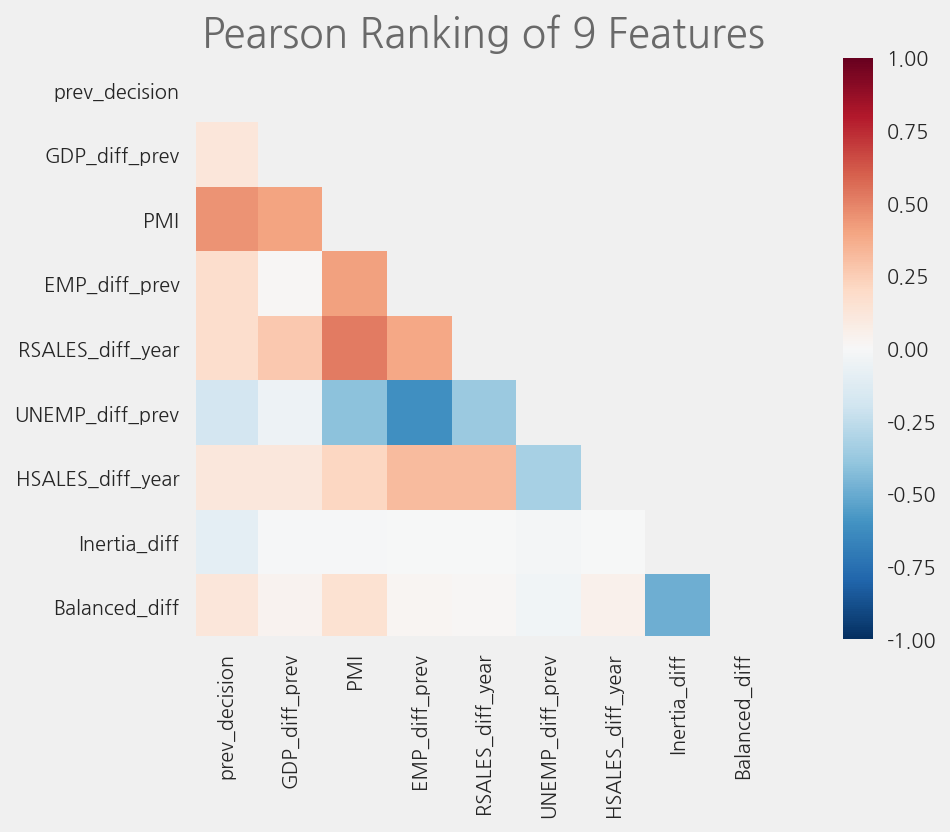

INFO:ekorpkit.visualize.plot:Saved figure to ./figs/plot_Rank2D.png


<Figure size 576x396 with 0 Axes>

In [19]:
cfg = eKonf.compose(config_group="visualize/plot=rank2d")
cfg.plots[0].x = X_cols
cfg.plots[0].y = y_cols
cfg.figure.figsize = (10, 6)
cfg.figure.fontsize = 14
eKonf.instantiate(cfg, data=f_small.data)

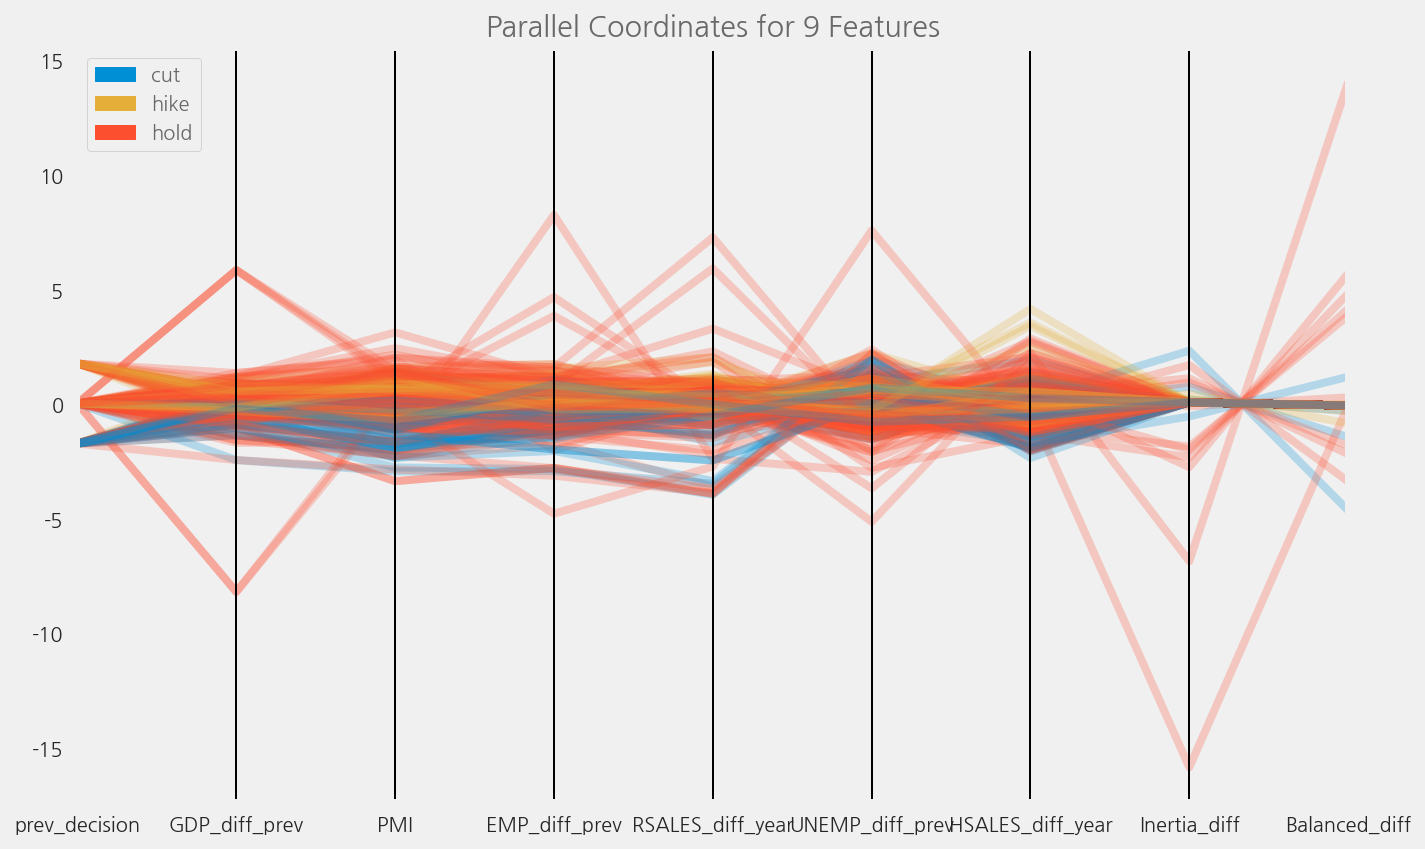

INFO:ekorpkit.visualize.plot:Saved figure to ./figs/plot_ParallelCoordinates.png


<Figure size 576x396 with 0 Axes>

In [22]:
cfg = eKonf.compose(config_group="visualize/plot=pcoords")
cfg.plots[0].x = X_cols
cfg.plots[0].y = y_cols
cfg.plots[0].classes = ["cut", "hold", "hike"]
cfg.plots[0].sample = 0.8
cfg.plots[0].shuffle = False
cfg.figure.figsize = (10, 6)
cfg.figure.fontsize = 10
eKonf.instantiate(cfg, data=f_small.data)

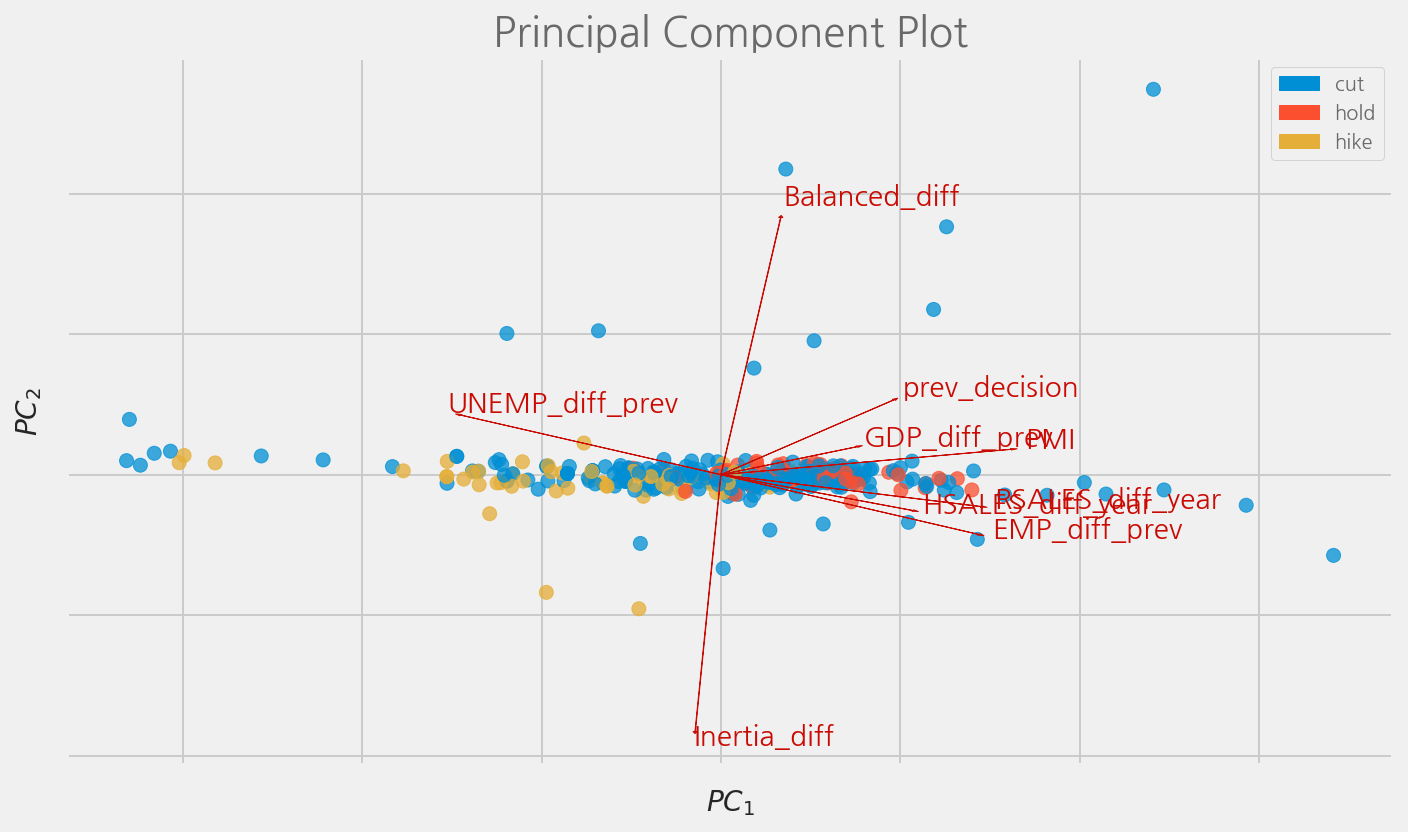

INFO:ekorpkit.visualize.plot:Saved figure to ./figs/plot_PCA.png


<Figure size 576x396 with 0 Axes>

In [25]:
cfg = eKonf.compose(config_group="visualize/plot=pca")
cfg.plots[0].x = X_cols
cfg.plots[0].y = y_cols
cfg.plots[0].classes = ["cut", "hold", "hike"]
cfg.figure.figsize = (10, 6)
cfg.figure.fontsize = 14
eKonf.instantiate(cfg, data=f_small.data)

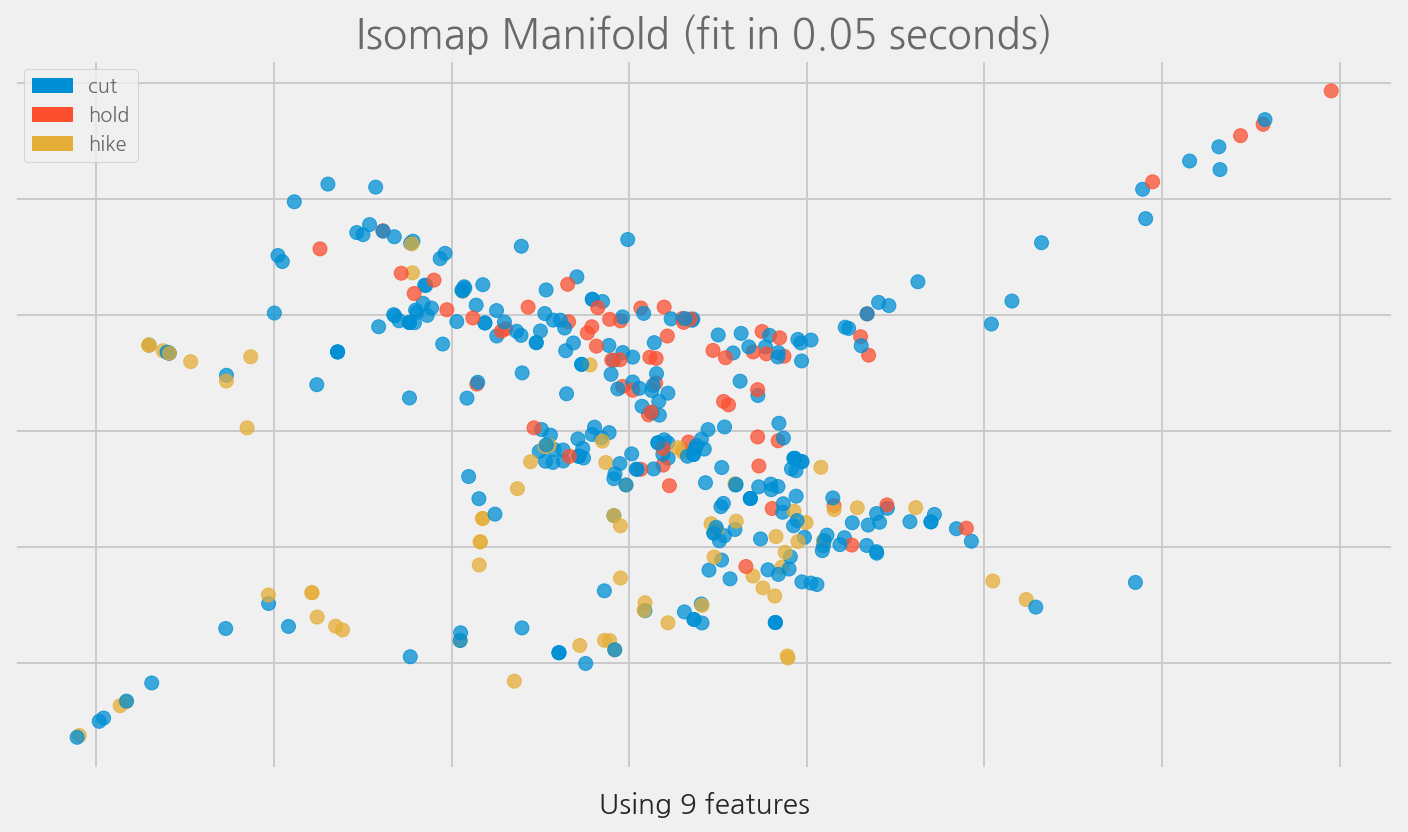

INFO:ekorpkit.visualize.plot:Saved figure to ./figs/plot_Manifold.png


<Figure size 576x396 with 0 Axes>

In [28]:
cfg = eKonf.compose(config_group="visualize/plot=manifold")
cfg.plots[0].x = X_cols
cfg.plots[0].y = y_cols
cfg.plots[0].classes = ["cut", "hold", "hike"]
cfg.plots[0].manifold="isomap"
cfg.plots[0].n_neighbors=4
cfg.figure.figsize = (10, 6)
cfg.figure.fontsize = 14
eKonf.instantiate(cfg, data=f_small.data)


/resources/.pyenv/versions/3.8.12/envs/ekonml38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/resources/.pyenv/versions/3.8.12/envs/ekonml38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


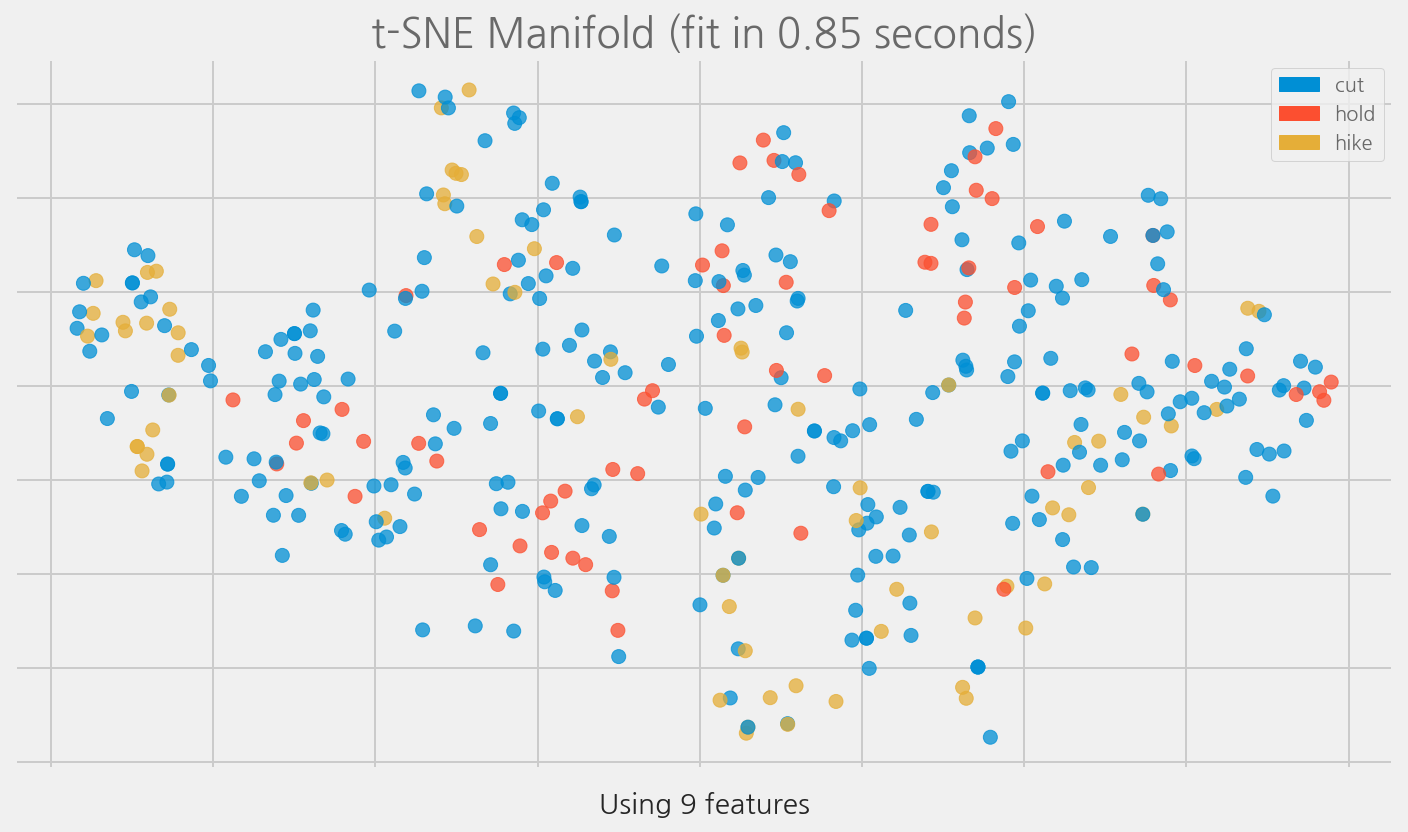

INFO:ekorpkit.visualize.plot:Saved figure to ./figs/plot_Manifold.png


<Figure size 576x396 with 0 Axes>

In [30]:
cfg = eKonf.compose(config_group="visualize/plot=manifold")
cfg.plots[0].x = X_cols
cfg.plots[0].y = y_cols
cfg.plots[0].classes = ["cut", "hold", "hike"]
cfg.plots[0].manifold = "tsne"
cfg.figure.figsize = (10, 6)
cfg.figure.fontsize = 14
eKonf.instantiate(cfg, data=f_small.data)
